# 분류의 개요
기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 방식  

<br>

분류의 알고리즘
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른 (또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

# 결정트리
- 규칙(if - else - )을 기반으로 모델을 학습함

![image](https://user-images.githubusercontent.com/70187490/128458197-b0c6cd9c-7353-4208-a000-8ceed4a6d3fc.png)

- 규칙 노드(Decision Node): 규칙 조건이 되는 노드
- 리프 노드(Leaf Node): 결정된 클래스 값
- 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성되는 가지(브랜치)  


규칙 조건이 만들 때마다 규칙 노드가 만들어짐  
많은 규칙이 있을 수록 모델이 복잡해지며 이는 과적합으로 이어짐  
  -> 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하됌

가능한 적은 결정 노드로 높은 예측 정확도를 가지려면?  
-> 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있는 결정 노드의 규칙이 필요  

<br>

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦  
- 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고  
- 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 자식 트리를 내려가면서
- 이를 반복하는 형식으로 데이터 값을 예측함  

<br>

이러한 정보의 균일도를 측정하는 대표적인 방법으로는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있음
- 정보이득은 엔트로피라는 개념을 기반으로 함
- 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
- 서로 다른 값이 섞여 있으면 엔트로피가 높고
- 같은 값이 섞여 있으면 엔트로피가 낮음
- 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값
- 정보 이득이 높은 속성을 기준으로 분할

<br>

- 지니 계수는 0이 가장 평등하고 1로 갈수록 불평등함
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

<br>

>즉 정보 이득이 높거나 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할 한 뒤,   
>데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정   

- 사이킷런의 DecisionTreeClassifier의 Default 값은 지니 계수  
![image](https://user-images.githubusercontent.com/70187490/128492000-073cdf9a-cca3-4023-a5cc-554f9c9ebba5.png)

## 결정 트리 모델의 결정

|결정 트리 장점|결정 트리의 단점|
|:-|:-|
|쉽고 직관적이다.|과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요|
|피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음|

- 모든 것을 만족하는 규칙은 만들 수 없다고 인정하고 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움

## 결정 트리 파라미터
![image](https://user-images.githubusercontent.com/70187490/128495313-e3a9e5a8-1dca-4522-b41b-92873cac9ae3.png)

### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf. predict(X_test)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

0.9333333333333333


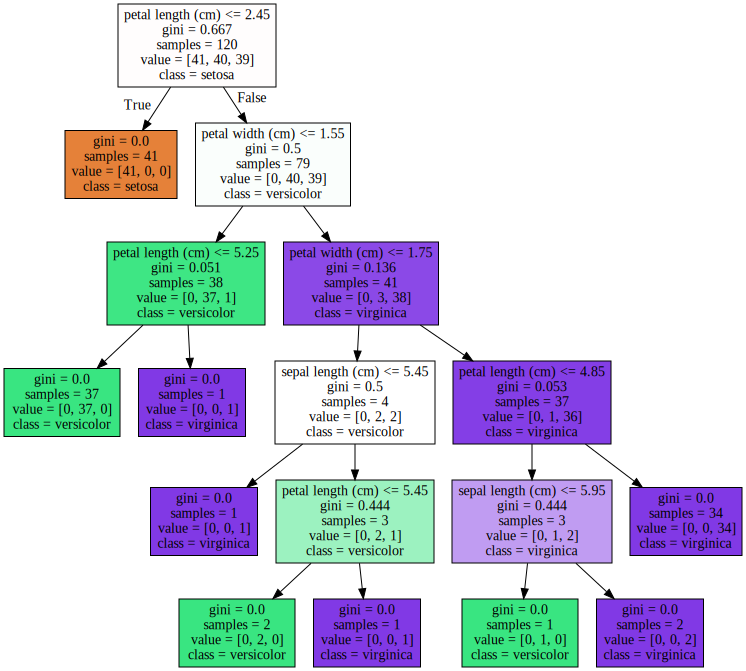

In [3]:
import graphviz

print(accuracy_score(pred, y_test))

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### DecisionTree 하이퍼 파라미터 조절 - max_depth

0.9333333333333333


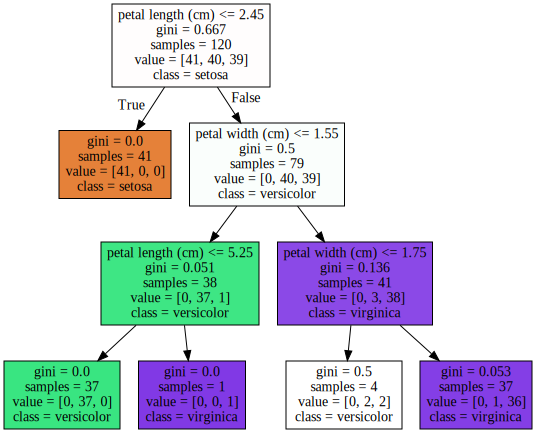

In [4]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, 
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_split

0.9333333333333333


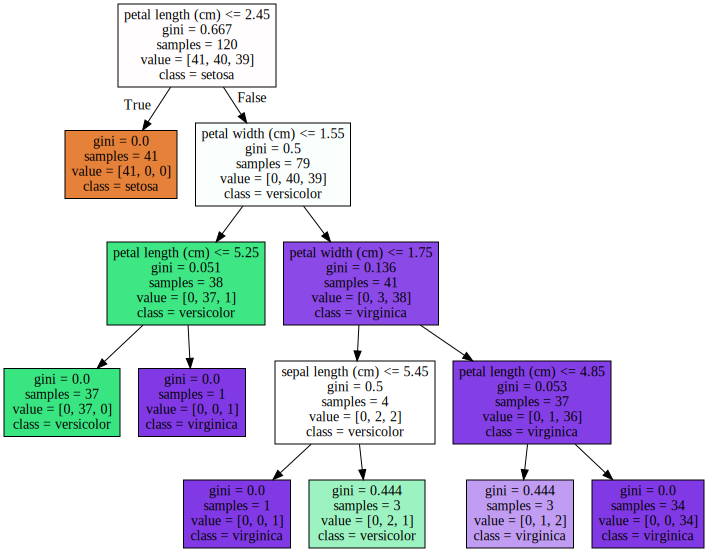

In [5]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_leaf

0.9333333333333333


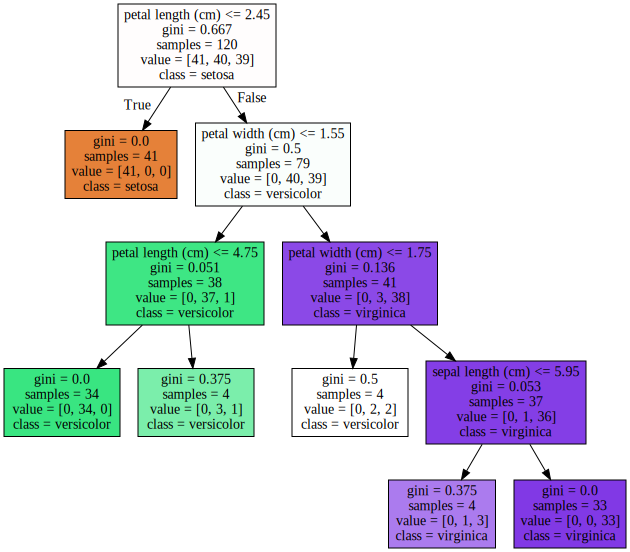

In [6]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Feature importance 시각화

Featrue importances: 
[0.006 0.    0.546 0.448]
sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


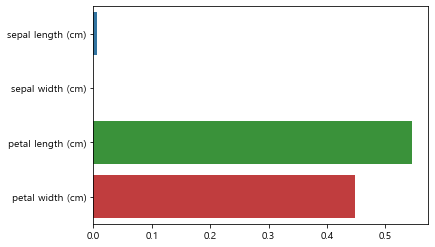

In [7]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Featrue importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);

### 결정 트리 과적합(Overfitting)
결정트리가 어떻게 학습 데이터를 분할하고 예측할 때 과적합이 일어나는지를 시각화

- make_classification( ) 함수:
    - 분류를 위한 테스트용 데이터를 쉽게 만들어줌
    - 반환하는 객체는 피처 데이터 세트와 클래스 레이블 데이터
    - 이 함수를 이용하여 2개의 피처가 3가지 유형의클래스 값을 가지는 데이터 세트를 만드는 예시  
    
위를 이용해 과적합 과정을 시각화

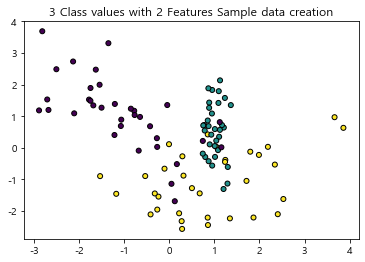

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2 차원 시각화를 위해서 피처는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k');

In [9]:
dt_clf.fit(X_features, y_labels)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

In [10]:
X_features

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516],
       [-0.04687748,  1.35489986],
       [ 1.20888898,  0.64232637],
       [ 1.71173001, -1.04637674],
       [ 1.29670808, -0.6054158 ],
       [ 1.24188996, -0.3819388 ],
       [-1.78273822,  1.52817583],
       [-1.50514147,  1.27186707],
       [ 0.87163989, -0.42276158],
       [ 2.53026908, -1.61974843],
       [ 0.95000368,  1.83240861],
       [-1.53716448, -0.89497353],
       [-2.13650855,  2.73389996],
       [ 1.01037788,  0.59402713],
       [ 1.9876467 , -0.22375521],
       [ 1.12463497,  2.13646176],
       [-0.65122279,  0.97865617],
       [ 0.85144036,  0.42548085],
       [-0.10789457, -0.65942376],
       [-0.41699944,

In [11]:
def visualize_boundary(estimator, X, y):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3);
    ax.axis('tight')
    ax.axis('off')
    
    estimator.fit(X, y)
    
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()        
    
    xx, yy = np.meshgrid( np.arange(xlim_start, xlim_end, 0.02),
                          np.arange(ylim_start, ylim_end, 0.02))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5,
                           levels=np.arange(len(np.unique(y)) + 1) - 0.5,
                           cmap='rainbow');

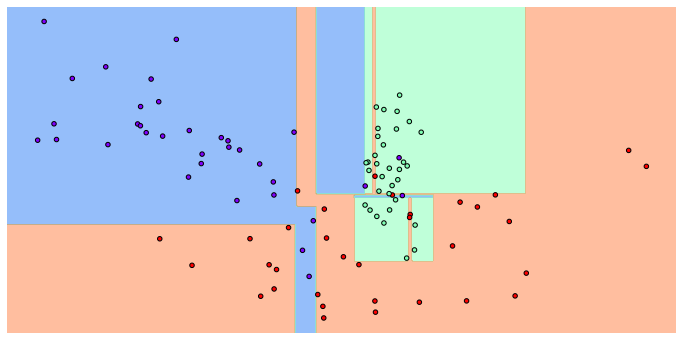

In [12]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화 

dt_clf = DecisionTreeClassifier()
visualize_boundary(dt_clf, X_features, y_labels)

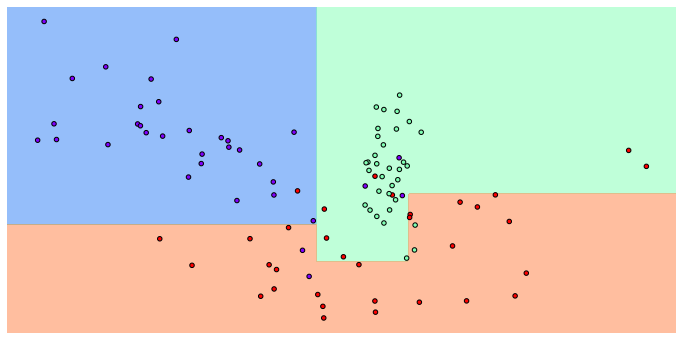

In [13]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 데이터는 1만 여개, 속성수는 561개
- 분류하려는 행동 갯수는 걷기, 계단 올라가기, 계단 내려가기, 앉기, 서있기, 눕기로 총 6가지
- 데이터 들은 갤럭시 S2의 가속도/자이로계에서 정보들을 50Hz로 받았음
- 전체 데이터 중 70%로가 훈련용, 30%로가 테스트용

In [14]:
import pandas as pd

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('D:\Python/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고 , 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z 축값으로 되어 있음
- 이러한 피처명을 pandas로 불러오면 오류가 발생됨
- 중복된 피처명에 대해서 원본 피처명에 _1또는 _2를 부여해 변경한 뒤에 이를 DataFrame으로 로드

In [15]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명이 중복되어 있으므로 이들에 대해서 원본 피처명에 _1, _2를 추가하는 함수 생성

In [19]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_'+str(x[1])
                                                                                              if x[1] > 0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    
    return new_feature_name_df

train 디렉토리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트로 나누고  
test 디렉토리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 로드

<br>
<br>

각 데이터 파일이 공백으로 분리돼 있으므로 sep인자로 공백문자를 입력(\s+)  
레이블 칼럼은 'action'으로 명명

In [46]:
def get_human_dataset( ):
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('D:\Python/human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('D:\Python/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('D:\Python/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('D:\Python/human_activity/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('D:\Python/human_activity/test/y_test.txt', sep='\s+', names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [47]:
print('## 학습 피처 데이터셋 info()')
X_train.info()

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [48]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


<BarContainer object of 6 artists>

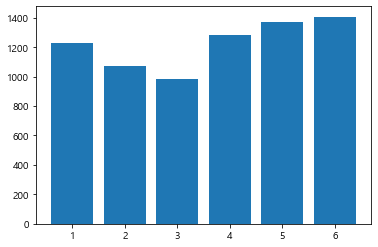

In [86]:
train_value_count = y_train['action'].value_counts()

print(train_value_count)
plt.bar(train_value_count.index, train_value_count)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


GrudSearchCV를 이용하여 max_depth값을 조정하여 예측 성능을 향상

In [89]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [92]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']].set_index('param_max_depth')

,mean_test_score
param_max_depth,
6,0.850791
8,0.851069
10,0.851209
12,0.844135
16,0.851344
20,0.850800
24,0.849440


In [93]:
max_depths=[6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측성
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8558
max_depth=8 정확도: 0.8707
max_depth=10 정확도: 0.8673
max_depth=12 정확도: 0.8646
max_depth=16 정확도: 0.8575
max_depth=20 정확도: 0.8548
max_depth=24 정확도: 0.8548


In [95]:
params = {
    'max_depth':[8, 12, 16, 20],
    'min_samples_split':[16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [125]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


feature_importances_속성을 이용해 중요 속성 중요도 시각화

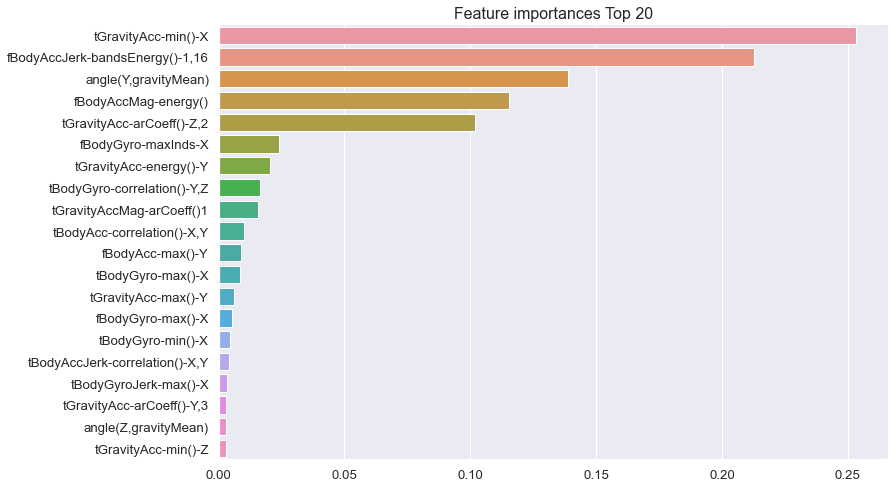

In [129]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, Seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 8))
plt.title('Feature importances Top 20', fontsize=16)
sns.barplot(x=ftr_top20, y=ftr_top20.index)
sns.set(font_scale = 1.3)
plt.show()